# Introduction 



Clustering refers to a very broad set of techniques for finding *subgroups*, or *clusters*, in a data set. When we cluster the observations of a data set, we seek to partition them into distinct groups so that the observations within each group are quite similar to each other.

For instance, suppose that we have a set of $n$ observations, each with $p$ features. The $n$ observations could correspond to tissue samples for patients with breast cancer, and the $p$ features could correspond to measurements collected for eah tissue sample, these could be clinical measurements, such as tumor stage or grade, or they could be gene expression measurements. 

We may have a reason to believe that there are a few different *unknown* subtype of breast cancer. 

 Clustering could be used to find these subgroups. This is an unsupervised problem because we are trying to discover the structure - in this case, distinct clusters - on the basis of a data set. 

Both clustering and PCA seek to simplify the data via a small number of summaries, but their mechanisms are different.

- PCA looks to find a low-dimensional representation of the observations that explain a good fracton of the variance. 

- Clustering looks to find homogeneous subgroups among the observations.

#K-Means Algorithm





1. Specify number of clusters $K$.
2. Initialize centtroids by first shuffling the dataset and then randomly selecting $K$ data points for the centroids without replacement.
3. Keep iterating until there is no change to the centroids i.e assignment of data points to clusters isn't changing
  - Compute the sum of the square distance between data points and all centroids
  - Assign each data point to the closest cluster(centroid).
  - Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster.

# Implementation

In [ ]:
import random
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt


%cd /content/drive/My\ Drive/colab_notebooks/machine_learning/data/
df = pd.read_csv("clustering.csv")

/content/drive/My Drive/colab_notebooks/machine_learning/data


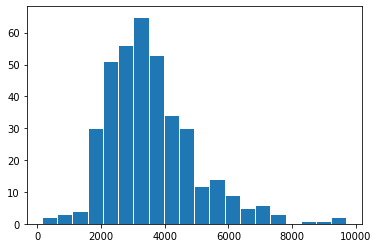

In [ ]:
df = df[['ApplicantIncome','LoanAmount']]

y1 = df['ApplicantIncome']
n_bins = 20
plt.hist(y1, bins=n_bins,edgecolor = "white")
plt.show()

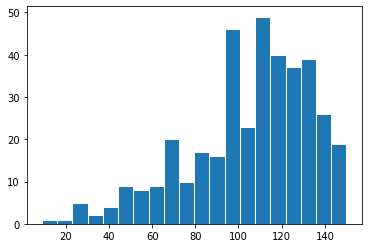

In [ ]:
y1 = df['LoanAmount']
n_bins = 20
plt.hist(y1, bins=n_bins,edgecolor = "white")
plt.show()

In [ ]:
def KMeanClustering(arr,K,eps):

  # No of clusters are equivalent to 
  # Initialize random Centroids 
 
  n = len(arr)
  random_centroids = random.sample(range(1, n), K)
  centroid_val = arr[random_centroids,:]
  centroids_lst=[]
  centroids_lst.append(centroid_val)
  clusters_lst = []
  diff = 9999
  j = 0
  while diff > eps:
    
    ###########################################################
      # 1. Code to calculate the Eucledian distance between the centroids 
      # and all the other observations.
      # 2. Assigning observations to centroids with least distance.
    ###########################################################

    euclidean_centroid_dist = np.sqrt(np.sum(np.square(arr[:,np.newaxis,:] - centroid_val),axis=2))
    assigned_cluster = np.argmin(euclidean_centroid_dist,axis=1).reshape(n,1)
    clusters_lst.append(assigned_cluster)
    ###########################################################
      # 3. Code segment to calculate the new centroids, based on
      #    on the assignment in the previous "assigned cluster"
      #    ASSIGNMENT.
    ###########################################################

    centroid_val_old = centroid_val
    centroid_val = np.zeros([K,arr.shape[1]])

    for i in range(0,K):

      cluster = np.where(assigned_cluster==i)[0]
      cluster_arr = arr[cluster,:]
      centroid_val[i,:] = np.mean(cluster_arr,axis=0)
      
    
    ###########################################################
      # 4. Code segment for the exit condition of the while loop
      # - Calculate the difference between new and the previous 
      #   centroid, if the difference is below the given eps,
      #   end the while and return the clusters and the 
      #   cluster centroids.
      # - and if not, keep executing the while loop
    ###########################################################

    diff =  (1/n)*np.sum(np.square(centroid_val_old - centroid_val))
    j+=1
  
  return assigned_cluster,centroid_val,clusters_lst,centroids_lst,j


In [ ]:
arr = np.array(df)
K = 3
eps = 1e-5

clusters,centroids,clusters_lst,centroids_lst,iter = KMeanClustering(arr,K,eps)


In [ ]:
print(arr.shape)

(381, 2)


In [ ]:
index0 = np.argwhere(clusters == 0).ravel()
print(len(index0))
cluster0 = arr[index0,:]
print(cluster0.shape)
index1 = np.argwhere(clusters == 1).ravel()
cluster1 = arr[index1,:]

index2 = np.argwhere(clusters == 2).ravel()
cluster2 = arr[index2,:]

86
(86, 2)


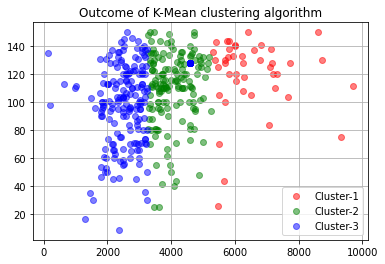

In [ ]:
plt.scatter(cluster0[:,0],cluster0[:,1],color='red',alpha=0.5,label='Cluster-1')
plt.scatter(cluster1[:,0],cluster1[:,1],color='green',alpha=0.5,label='Cluster-2')
plt.scatter(cluster2[:,0],cluster2[:,1],color='blue',alpha=0.5,label='Cluster-3')
plt.title("Outcome of K-Mean clustering algorithm")
plt.legend()
plt.grid()
plt.show()

# Hierarchical Clustering

1. Begin with $n$ observations and a measure (such as Euclidean distance) of all the  ${n \choose 2} = n(n-1)/2$ pairwise dissimilarities. Treat each observation as its own cluster.

2. For $i = n,n-1,\ldots, 2$:

  (a) Examine all pairwise inter-cluster dissimilarities among the $i$ clusters and identify the pair of clusters that are least dissimilar ( that is, most similar). Fuse these two clusters. The dissimilarity between these two clusters indicates the height in the denogram at which the fusion should be placed. 

  (b) Compute the new pairwise inter-cluster dissimilarities among the $i-1$ remaining clusters 


---------------------------------

The above mentioned algorithm is simple enough, but one issue has not been addressed. 
- We have a concept of the dissimilarity between paris of observations, but how do we define the dissimilarity between two clusters if one or both of the clusters contains multiple observations ?

- The concept of dissimilarity between a pair of observations needs to be extended to a pair of *groups of observations*. This extension is achieved by developing the notion of *linkage*, which defines the dissimilarity between two groups of observations. 

- The four most common types of linkage - *complete,average,single and centroid*.

For our implementation, we will consider the **Complete Linkage**

**Complete Linkage** : Maximal intercluster dissimilarity. Compute all pairwise dissimilarities between the observations in cluster $A$ and the observations in cluster $B$, and record the largest of these dissimilarities. 


### Example : Agglomerative Hierarchical Clustering

[Source](https://online.stat.psu.edu/stat555/node/86/)

Clustering starts by computing a distance between every pair of units that you want to cluster. A distance matrix will be symmetric. The table below is an example of a distance matrix. Only the lower triangle is show, because the upper triangle can be filled in my reflection.

\begin{align}
\begin{array}{|c|} \hline
 & 1 & 2 & 3 & 4 & 5\\ \hline
1 & 0 &  &  \\
2 & 9 & 0  \\
3 & 3 & 7 & 0 \\ 
4 & 6 & 5 & 9 & 0\\
5 & 11 & 10 & 2 & 8 & 0\\ \hline
\end{array}
\end{align}

- Now let's start clustering. The smallest distance is between three and five and they get linked up or merged first into a cluster '35'.

- To obtain the new distance matrix, we need to remove the 3 and 5 entries and replace with by entry '35'.
- Since we are using complete linkage clustering, the distance between '35' and every other item is the maximum of the distance between this item and 3 and this item and 5.

    - for example : $d(1,3) = 3, d(1,5)=11 => D(1,"35")=11$
    This gives us the distance matrix. The items in with the smallest distance get clustered next.

\begin{align}
\begin{array}{|c|} \hline
 & 35 & 1 & 2& 4 \\ \hline
35 & 0 &  &  \\
1 & 11 & 0  \\
2 & 10 & 9 & 0 \\ 
4 & 9 & 6 & 5 & 0\\  \hline
\end{array}
\end{align}

Similarly

Now, we combine $2 \text{ & } 4$

\begin{align}
\begin{array}{|c|} \hline
 & 35 & 24 & 1 \\ \hline
35 & 0 &  &  \\
24 & 10 & 0  \\
1 & 11 & 9 & 0 \\ \hline
\end{array}
\end{align}

Now we combine $'24' \text{ with } 1$

\begin{align}
\begin{array}{|c|} \hline
 & 35 & 241  \\ \hline
35 & 0 &  &  \\
241 & 11 & 0  \\ \hline
\end{array}
\end{align}

The above results is summarized below. On this plot, the y-axis shows the distance between the objects at the time they were clustered. This is called the **Clustered Height**. 





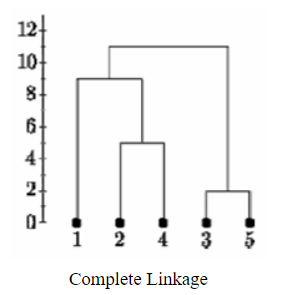

**Determining Clusters**

One of the problems with hierarchical clustering is that there is no objective way to say how many clusters there are. 
If we cut the single linkage tree at the point shown, we would say we have two clusters. 


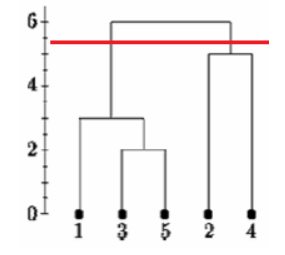

However, if we cut the tree lower we might say that there is one cluster and two singletons.

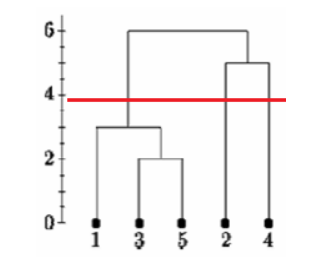

In [ ]:
# to run the code on the data set above and then a little larger data set 

class HierarchicalClustering:

  def __init__(self,arr):
    self.arr = arr
    self.n = len(self.arr)
    self.stagearr = np.zeros([2,self.n])
    l = int(np.ceil(self.n/2))
    print("l",l)
    self.clusters = np.empty(l,dtype=object)
    self.clusterCounter = 0
  
  #def euclideanDist(self)
  
  def CompleteLinkage(self):

    # call the EuclideanDist Function
    # For this example, we are skipping that step


    self.arr = np.where(self.arr == 0, 100, self.arr)

    for k in range(len(self.arr),2,-1):

      print("k",k)
      
      
      self.pos = np.where(self.arr == np.min(self.arr))[0]

      print("self.pos",self.pos)

      # First calling the cluster function, to save the newly groups 
      # cluster 
      
      self.storeclusters()

      self.stagearr = self.arr[self.pos,:]

      #2 Delete statement one row and one column
      self.arr[self.pos,:] =  100
      self.arr[:,self.pos] =  100
      print("self.arr","\n",self.arr)
      #self.arr = np.delete(self.arr,self.pos,axis=1)
      #self.arr = np.delete(self.arr,self.pos,axis=0)
    
      # deleting the present cluster indexes from the stage arr
      print("stagearr","\n",self.stagearr)
      self.stagearr[:,self.pos] =  100
   
      
      print("After placeete",self.stagearr)
      self.arr[self.pos,:] =  self.stagearr
      self.arr[:,self.pos] =  self.stagearr.T
      newrow = np.max(self.stagearr,axis=0)
      newrow = newrow.reshape(len(self.stagearr[1]),1)

      #self.arr = np.hstack((self.arr, newrow))

      newrow = np.append(newrow,100)
      #self.arr = np.vstack((self.arr, newrow.T))
      

      print("self.arr")
      print(self.arr)
      
  
  def storeclusters(self):
    
    print("we are in clusters ")
    is_looping = True

    # When no clusters are created yet.
    if self.clusterCounter == 0:
      self.clusters[0] = self.pos
      is_looping = False

    else:
      i = 0
      while  i < self.clusterCounter:
        
        for j in range(0,2):
          print("j0",j)
          print("i",i)
         
          if self.clusters[i] is None:
            self.clusters[i] = self.pos
            is_looping = False
            break
          elif any(x in self.pos for x in self.clusters[i]):
            self.clusters[i] = np.append(self.clusters[i],self.pos)
            print("elIf", self.clusters )
            is_looping = False
            break
          else:
            continue

        if is_looping is False:
          break  
        else:
          i+=1
          
          
    # Case when none of the existing clusters contain any of the 
    # 2 new cluster values.
    if is_looping is True:
      self.clusters[self.clusterCounter+1] = self.pos
     

    self.clusterCounter +=1
    print("Cluster Counter",self.clusterCounter)
    print("Cluster",self.clusters)
    return self.clusters



In [ ]:
f = HierarchicalClustering(x)
f.CompleteLinkage()
#f.clusters()

l 13
k 25
self.pos [9]
we are in clusters 
Cluster Counter 1
Cluster [array([9]) None None None None None None None None None None None None]


IndexError: ignored

In [ ]:
import random
random.seed(2)
x = np.random.normal(10,5,50).reshape(25,2)
x[0:25,0] = x[0:25,0]+ 3
x[0:25,1] = x[0:25,1]-4
print(x)

[[ 5.34527179  9.4738194 ]
 [12.45726243  9.7374621 ]
 [11.94022622 12.54273861]
 [18.64258696 12.94332958]
 [14.15161936 10.44465552]
 [ 6.60958318  3.50734521]
 [16.57726073  8.24986018]
 [15.59865107  6.19294276]
 [ 4.85377854  9.50420034]
 [13.48193936 -0.30374516]
 [24.95740923  4.15751527]
 [23.04742754 14.06541976]
 [ 8.23589844 13.4393038 ]
 [15.08959773 10.02123544]
 [ 7.55952291 11.11464924]
 [13.06392298  3.96984672]
 [16.07720439  4.52031749]
 [10.04113041  8.9965649 ]
 [12.05649419  6.48268752]
 [17.24744721 15.21122072]
 [14.23036583  9.28744381]
 [ 5.97560551  1.52259464]
 [10.92930899  6.17710445]
 [15.94983823  3.40697168]
 [15.79299311  1.98262685]]


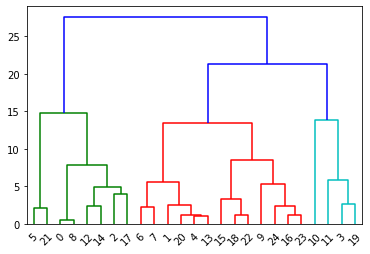

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))

In [ ]:
import numpy as np
g = np.array([[0,9,3,6,11],
                [9,0,7,5,10],
                [3,7,0,9,2],
                [6,5,9,0,8],
                [11,10,2,8,0]])


In [ ]:
f = [3,5]
t = [[7,8],[4,5],[6,0]]

any(x in f for x in t[1])


True

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


%cd /content/drive/My\ Drive/colab_notebooks/machine_learning/data/
df = pd.read_csv("Mall_Customers.csv")

/content/drive/My Drive/colab_notebooks/machine_learning/data


In [ ]:
df.columns
df = df.loc[:,['Annual Income (k$)','Spending Score (1-100)']]
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [ ]:
import numpy as np

a = np.array([[1,2,3],[4,6,7],[10,11,12]])
print(a)
g = np.square(a - a[:,np.newaxis,:])
print(g)
h = np.sum(g,axis=2)
print(h)

[[ 1  2  3]
 [ 4  6  7]
 [10 11 12]]
[[[ 0  0  0]
  [ 9 16 16]
  [81 81 81]]

 [[ 9 16 16]
  [ 0  0  0]
  [36 25 25]]

 [[81 81 81]
  [36 25 25]
  [ 0  0  0]]]
[[  0  41 243]
 [ 41   0  86]
 [243  86   0]]
